In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
sys.path.append(os.path.join(os.getcwd(), ".."))
from support.generate_ar_data import *
from support.pd_support import *
from support.calculations_support import *
from support.mecanum_calculations import *
from support.ar_calculations import *
import pandas as pd
from tqdm import tqdm

In [24]:
_parent_folder = "single_cam_jan_5_2023_3cm"
_base_pth = os.path.dirname(os.getcwd())
_base_pth = os.path.join(_base_pth, "recording_programs", "test_data", _parent_folder)
_base_pth

'c:\\Users\\Sujith\\Documents\\Projects\\armbo\\recording_programs\\test_data\\single_cam_jan_5_2023_3cm'

In [25]:
"""path based on text file"""
data_pth_file = open(os.path.join(os.path.dirname(os.getcwd()), "src", "data_path.txt"), "r+")
_base_pth = data_pth_file.read()
_base_pth = os.path.join(_base_pth, _parent_folder)
_base_pth

'D:\\ArUco recordings\\single_cam_jan_5_2023_3cm'

In [27]:
""" read excel sheet"""
folder_df = pd.read_excel(os.path.join(_base_pth, "00_analysis", "calibration_files.xlsx"))
_analysis_pth = os.path.join(_base_pth, "00_analysis")
folder_df

,folder_name,calibration_folder,flip
0,sk20_15_forward_fast,calibration_15fps_00,False
1,sk20_15_forward_fast_2,calibration_15fps_00,False
2,sk20_15_forward_medium,calibration_15fps_00,False
3,sk20_15_forward_medium_2,calibration_15fps_00,False
4,sk20_15_forward_slow,calibration_15fps_00,False
...,...,...,...
91,sk20_60_sideways_fast_2,calibration_60fps_00,False
92,sk20_60_sideways_medium,calibration_60fps_00,False
93,sk20_60_sideways_medium_2,calibration_60fps_00,False
94,sk20_60_sideways_slow,calibration_60fps_00,False


In [28]:
# calculate maximum velocity
# "movement_type" is speed of movement using metronome
movement_speed_df = pd.DataFrame(columns=["folder_name", "velocity_x", "velocity_y", "velocity_z", "velocity", "object", "fps", "movement_type"])

In [30]:
scaler = 100
del_t = 1/100

for idx, _folder_name in enumerate(tqdm(folder_df.folder_name)):
    
    _mc_folder = os.path.join(_analysis_pth, "coordinates_mc", _folder_name + ".csv")
    df = pd.read_csv(_mc_folder)
    sx = np.abs(df.x.diff()).mean() * scaler / del_t
    sy = np.abs(df.y.diff()).mean() * scaler / del_t
    sz = np.abs(df.z.diff()).mean() * scaler / del_t
    
    if _folder_name.split("_")[2] == "quad":
        _object = "quad"
    else:
        _object = "skateboard"
        
    fps = int(_folder_name.split("_")[1])
    movement_speed = _folder_name.split("_")[3]
    movement_speed_df.loc[idx] = [_folder_name,sx, sy, sz, np.sqrt(sx**2 + sy**2 + sz**2), _object, fps, movement_speed]
    

100%|██████████| 96/96 [00:07<00:00, 12.86it/s]


In [13]:
scaler = 100
del_t = 1/100

sx = np.abs(df.x.diff()).mean() * scaler / del_t
sy = np.abs(df.y.diff()).mean() * scaler / del_t
sz = np.abs(df.z.diff()).mean() * scaler / del_t

print(f"X: {sx:.2f} cm/s")
print(f"Y: {sy:.2f} cm/s")
print(f"Z: {sz:.2f} cm/s")

velocity = np.sqrt(sx**2 + sy**2 + sz**2)
print(f"Total: {velocity:.2f} cm/s")

X: 12.08 cm/s
Y: 0.90 cm/s
Z: 1.47 cm/s
Total: 12.20 cm/s


In [15]:
# movement_speed_df.to_csv(os.path.join(_analysis_pth, "movement_speed.csv"), index=False)
movement_speed_df

,folder_name,velocity_x,velocity_y,velocity_z,velocity,object,fps,movement_type
0,sk16_15_forward_fast,1.080699,1.171006,16.828587,16.903860,skateboard,15,fast
1,sk16_15_forward_fast_2,1.365928,1.217664,17.787366,17.881243,skateboard,15,fast
2,sk16_15_forward_medium,1.103234,0.945980,14.204725,14.278874,skateboard,15,medium
3,sk16_15_forward_medium_2,1.242891,0.938812,13.089950,13.182296,skateboard,15,medium
4,sk16_15_forward_slow,1.032439,0.659898,9.396589,9.476142,skateboard,15,slow
...,...,...,...,...,...,...,...,...
84,sk16_60_sideways_fast_2,21.943099,1.581302,2.308786,22.120818,skateboard,60,fast
85,sk16_60_sideways_medium,18.774007,1.263315,2.440544,18.974076,skateboard,60,medium
86,sk16_60_sideways_medium_2,18.560534,1.302685,2.098780,18.724190,skateboard,60,medium
87,sk16_60_sideways_slow,10.141891,0.790857,1.584803,10.295388,skateboard,60,slow


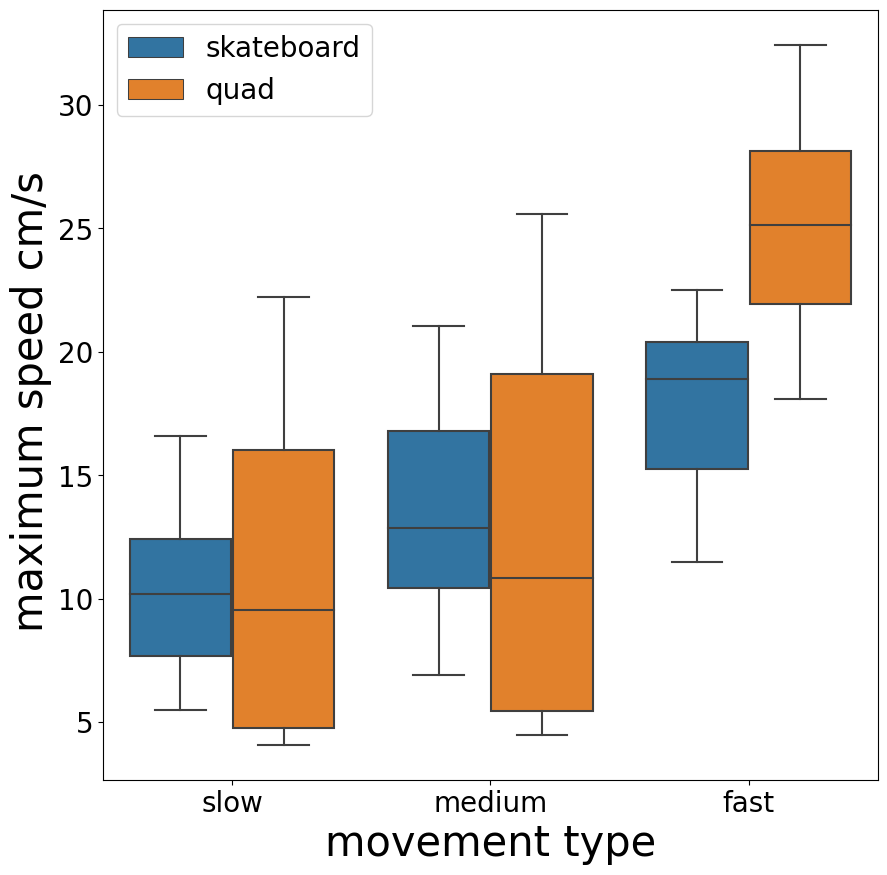

In [31]:
# box plot based on fps
fig, ax = plt.subplots(figsize=(10, 10))

sns.boxplot(x="movement_type", y="velocity", hue="object", 
            data=movement_speed_df, ax=ax,
            order = ["slow", "medium", "fast"])

# label
ax.set_xlabel("movement type", fontsize=30)
ax.set_ylabel("maximum speed cm/s ", fontsize=30)
ax.legend(fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()